In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Student Mental Health Analysis During Online Learning.csv")

In [3]:
df.shape

(1000, 10)

In [4]:
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


In [5]:
df.sample(5)

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
25,Anika,Female,26,MTech,4.7,6.8,9.6,Medium,Yes,Declined
569,Dev,Other,22,BTech,6.2,4.1,7.0,Low,No,Declined
760,Anika,Female,26,MTech,7.5,5.9,2.5,Medium,No,Declined
755,Meera,Female,24,MTech,11.0,6.1,9.4,Medium,No,Same
940,Anika,Female,20,BTech,2.4,6.0,9.0,Medium,No,Same


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [7]:
df.isnull().sum()

Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64

## Distribution Plots

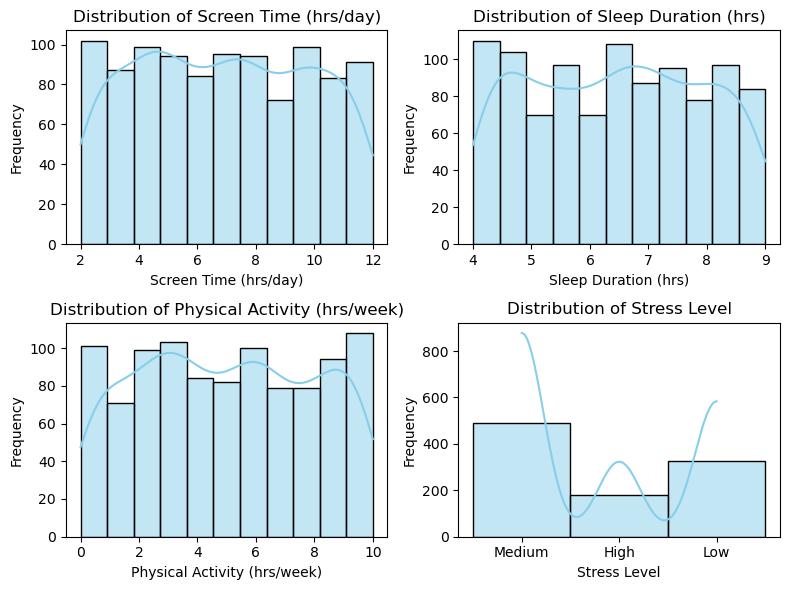

In [12]:
num_features = ['Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Stress Level']

plt.figure(figsize=(8, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Boxplots by Academic Performance Change

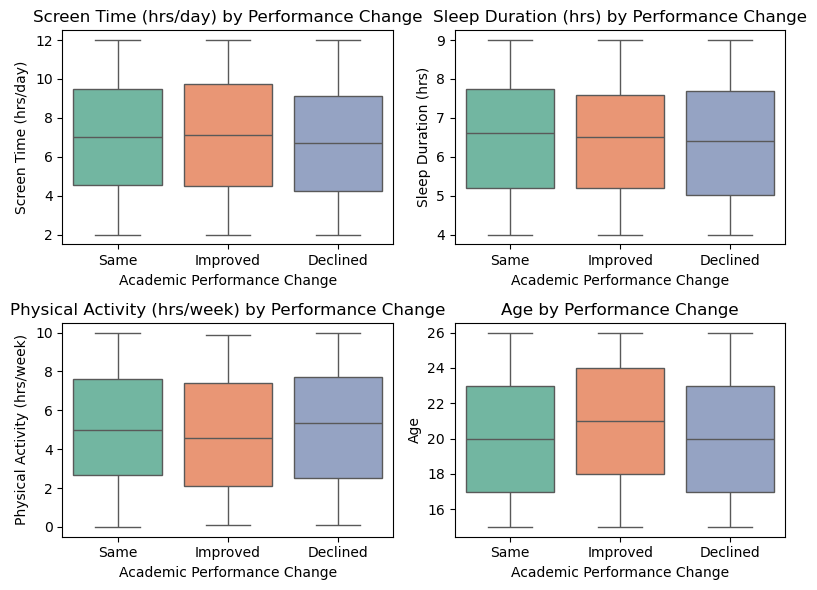

In [13]:
num_features = ['Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Age']

plt.figure(figsize=(8, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Academic Performance Change', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Performance Change')
plt.tight_layout()
plt.show()

## Distribution of Academic Performance Change


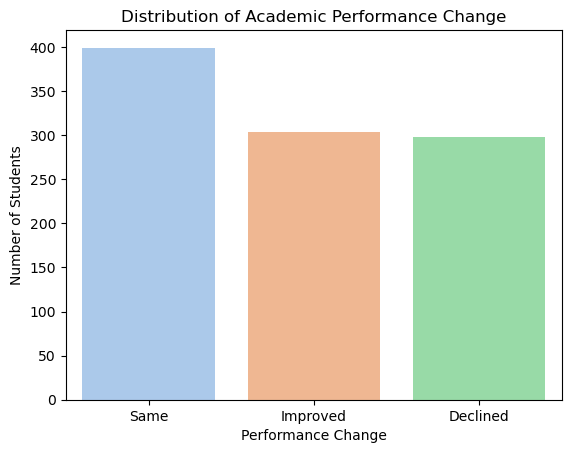

In [25]:
sns.countplot(data=df, x='Academic Performance Change', palette='pastel')
plt.title('Distribution of Academic Performance Change')
plt.xlabel('Performance Change')
plt.ylabel('Number of Students')
plt.show()

## Count Plot: Gender and Academic Performance

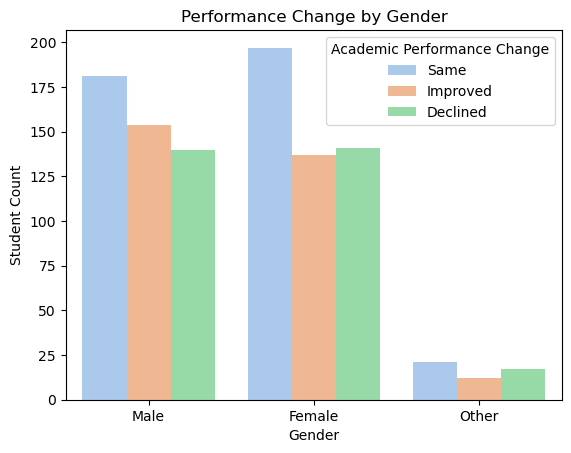

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Academic Performance Change', palette='pastel')
plt.title('Performance Change by Gender')
plt.ylabel('Student Count')
plt.show()

## Heatmap for Correlations

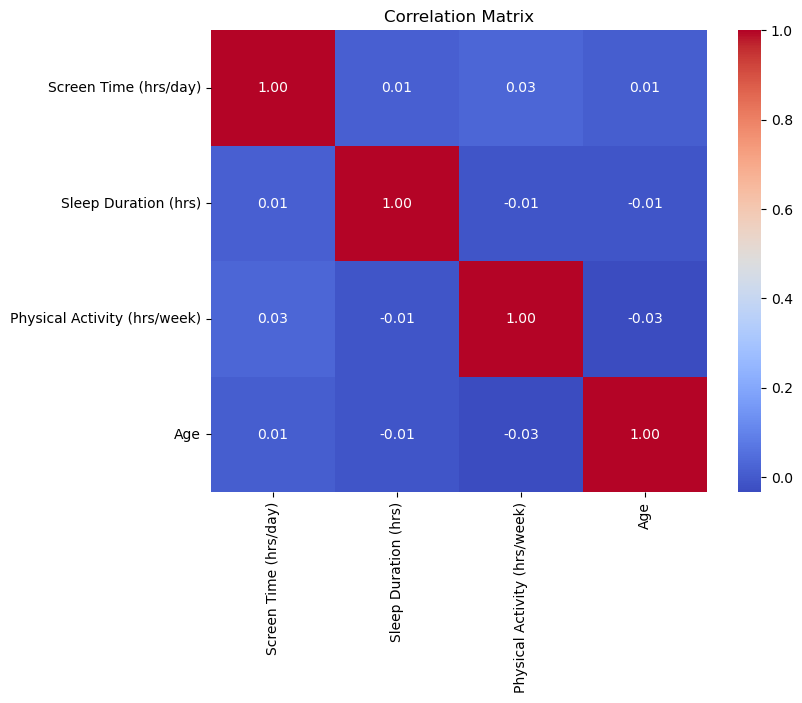

In [19]:
num_features = ['Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Age']

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Pairwise Relationships Colored by Academic Performance

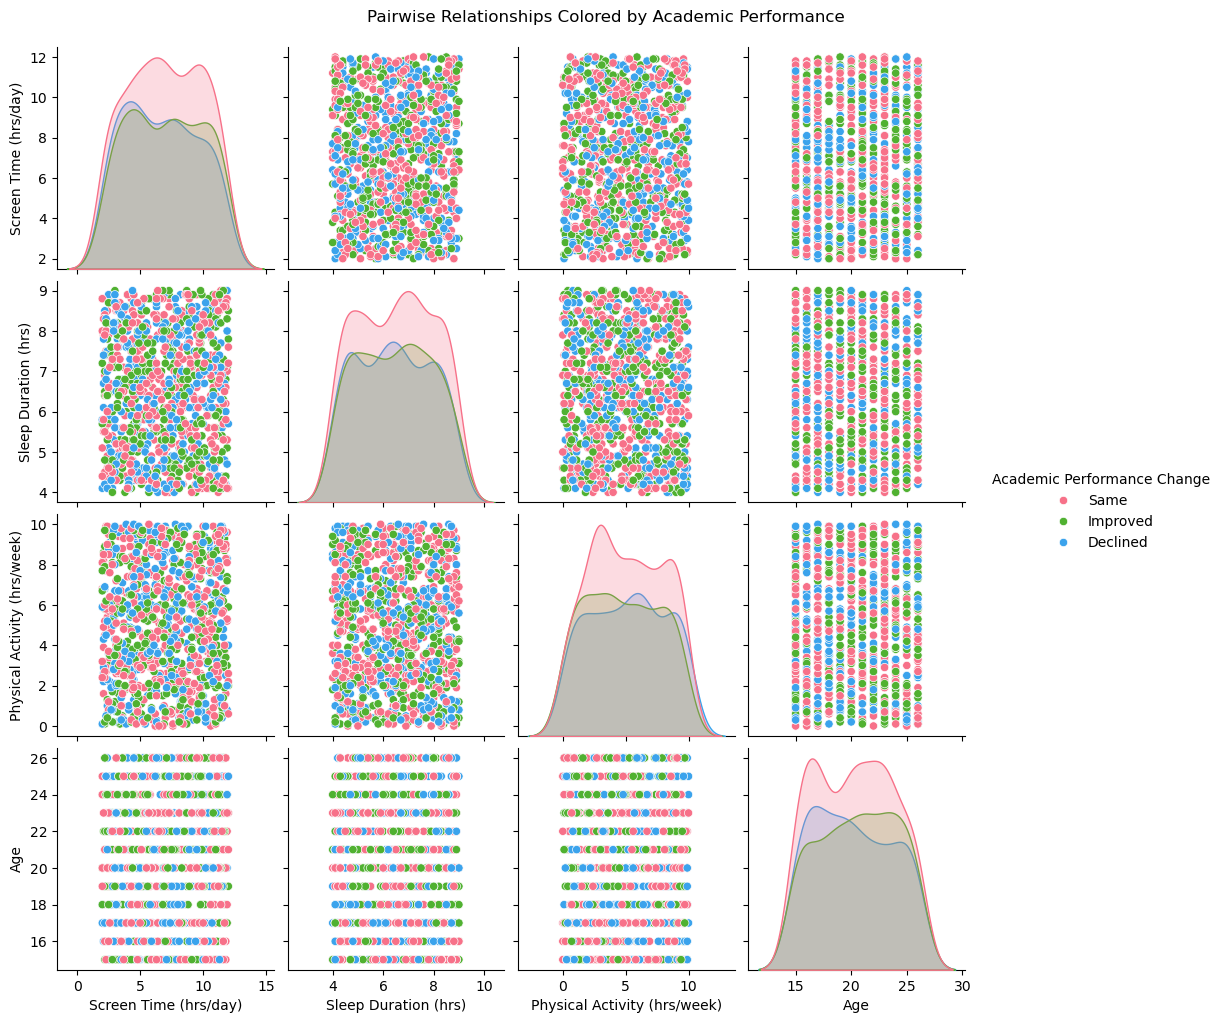

In [28]:
num_features = ['Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Age']

sns.pairplot(df, hue='Academic Performance Change',vars=num_features,palette='husl')
plt.suptitle("Pairwise Relationships Colored by Academic Performance", y=1.02)
plt.show()